## Problem Overview
 

### Description 
The overarching purpose of our research project is it study the relationship between different risk factors that can cause cardiovascular disease. We believe it is an important undertaking because we are always looking to understand the relationships between lifestyle and health. With science-backed findings, we want to help individuals in making better decisions, communities in promoting healthier public health practices, and governments in finding the best balance in resource-allocation between public healthcare and research and development.

### Background
For decades now, cardiovascular disease has been the leading killer of Americans. In the past years however, advances in biomedical research has improved emergency response systems and treatment, and public health has been better in prevention efforts. [Source: CVD: A costly burden for America](https://healthmetrics.heart.org/wp-content/uploads/2017/10/Cardiovascular-Disease-A-Costly-Burden.pdf). Even so, cardiovascular disease continues to be the leading cause of death, a major cause of disability, and a major contributor to productivity loss in Americans. In fact, an estimated 71.3 million--about one in three--Americans have one or more types of heart disease. This burden translates not only in the loss of life, but also affects society’s quality of lives and puts a toll on public healthcare spending that could otherwise be put into other social good programs. Prevention is usually much cheaper to invest in than treatment, and so understanding risk factors has a huge potential impact on reducing burden. [Source: An overview of CVD burden in the U.S.](https://www.healthaffairs.org/doi/full/10.1377/hlthaff.26.1.38)

### Data Description and Features
Data description: We will be working on a dataset about cardiovascular disease [available on Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) that consists of 70,000 records of patients data. We were particularly interested in exploring a research question in the domain of healthcare. We wanted to understand the relationship between some given risk factors that contribute to a certain disease. The main outcome that we are concerned with is the presence or absence of cardiovascular disease. Our search led us to this dataset and had all the relevant information that we could use to predict cardiovascular disease. 

There are 3 types of input features:
1. Objective: factual information
2. Examination: results of medical examination
3. Subjective: information given by the patient



| Feature | Variable Type   | Variable   | Value Type  |
|------|------|------|------|
|   Age  | Objective Feature|age | int(days)|
|   Height  | Objective Feature |height |int(cm)|
|   Weight  | Objective Feature |weight |float(kg)|
|   Gender  | Objective Feature |gender |categorical code|
|   Systolic blood pressure  | Examination Feature |ap_hi |int|
|   Diastolic blood pressure  | Examination Feature |ap_lo |int|
|   Cholesterol  | Examination Feature |cholesterol |1: normal, 2: above normal, 3: well above normal|
|   Glucose  | Examination Feature | gluc |1: normal, 2: above normal, 3: well above normal|
|   Smoking | Subjective Feature |smoke |binary|
|   Alcohol Intake | Subjective Feature |alco |binary|
|   smoking | Subjective Feature |smoke |binary|
|   Physical Activity | Subjective Feature |active|binary|
|   Presence or absence of cardiovascular disease | Target Variable |cardio |binary|


## Data Analysis

In [110]:
import pandas as pd    
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [96]:
df = pd.read_csv('data/cardio_train.csv', sep=';', index_col = "id")


In [97]:
# convert the unit of the column "age" in days into in years
df['age_in_years'] = (df['age'] / 365).round().astype('int')


In [98]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


We create a new feature - Body Mass Index (BMI):

$$BMI=\frac{mass(kg)}{height(m)^2}$$ 


In [99]:
# create a column called BMI 
df['bmi'] = df['weight'] /  ((df['height'] / 100) ** 2)

In [63]:
# df['bmi_new'] = np.where(df['bmi'] < 18.5, "Underweight", "")

In [64]:
# df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi,bmi_new
id,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,
8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,
9,22113,1,157,93.0,130,80,3,1,0,0,1,0,61,37.729725,
12,22584,2,178,95.0,130,90,3,3,0,0,1,1,62,29.983588,
13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48,28.440955,


In [69]:
# df['bmi_new'] = "Underweight" if df.bmi.any() < 18.5 else "Healthy"
# "nice" if is_nice else "not nice"

In [100]:
# create a new column called bmi_scale
conditions = [(df['bmi'] < 18.5), ((df['bmi'] >= 18.5) & (df['bmi'] <= 24.9)), ((df['bmi'] > 24.9) & (df['bmi'] <= 29.9)), (df['bmi'] > 29.9) ]
choices = [1,2,3,4] #["Underweight", "Healthy", "Overweight", "Obese"]
df['bmi_scale'] = np.select(conditions, choices, default=np.nan).astype('int')

In [101]:
# check if the dataframe has any missing values
df.isnull().values.any()

False

In [102]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi,bmi_scale
id,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,2
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,4
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,2
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,3
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,2
8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,3
9,22113,1,157,93.0,130,80,3,1,0,0,1,0,61,37.729725,4
12,22584,2,178,95.0,130,90,3,3,0,0,1,1,62,29.983588,4
13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48,28.440955,3


## Univariate Analysis

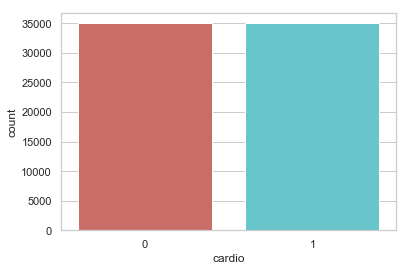

In [112]:
df['cardio'].value_counts()
sns.countplot(x="cardio", data=df, palette="hls")
plt.show()

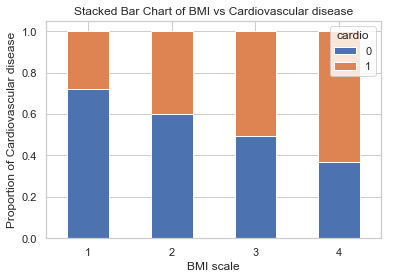

In [127]:
table=pd.crosstab(df.bmi_scale,df.cardio)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of BMI vs Cardiovascular disease')
plt.xlabel('BMI scale')
plt.ylabel('Proportion of Cardiovascular disease')
plt.xticks(rotation=0)
xlabel  =  ['Underweight', "Healthy", "Overweight", "Obese"]



## Multivariate Analysis

## Machine learning